In [167]:
import sys
import os
home = os.environ['HOME']
sys.path.append(home + '/projects/turbubox/tools/lib')

import numpy as np
import pandas as pd
import glob

import h5
import tables
import ulz

import matplotlib
matplotlib.rcParams.update({'font.size': 9})

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

dpi = 100
fac = 0.5
geo = (fac*1920,fac*1080)

In [168]:
fpath = '/mnt/data/couchdg/newdeal/data/chkpt_0020.h5'
h5file = h5.File(fpath, mode="r")

In [169]:
patches = [h5file.get('/patches/{:04d}/payload/hydro/state'.format(i)) for i in range(1,5)]
patches

[<HDF5 dataset "state": shape (20, 20, 4, 5, 5), type "<f8">,
 <HDF5 dataset "state": shape (20, 20, 4, 5, 5), type "<f8">,
 <HDF5 dataset "state": shape (20, 20, 4, 5, 5), type "<f8">,
 <HDF5 dataset "state": shape (20, 20, 4, 5, 5), type "<f8">]

In [170]:
datas = [np.concatenate([np.concatenate(row,axis=1) for row in patch[:,:,0,:,:]]) for patch in patches]
data = np.concatenate([
            np.concatenate([datas[1], datas[3]], axis=0),
            np.concatenate([datas[0], datas[2]], axis=0),
        ],axis=1)

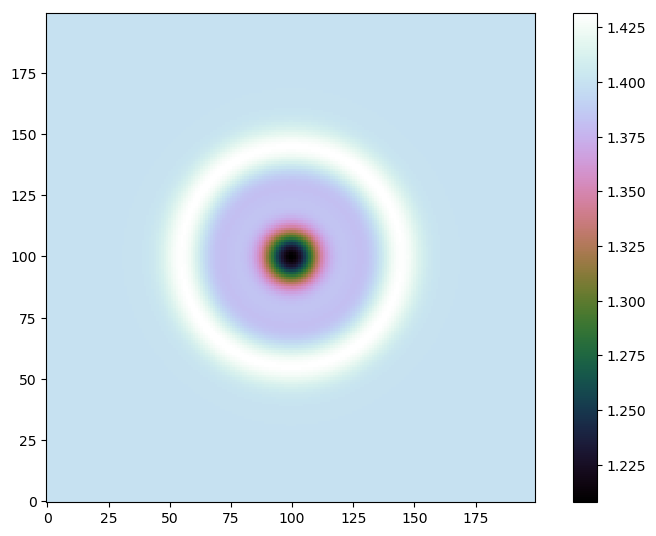

In [171]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi)
plt.imshow(
    data,
    #extent = fh.domain.T.ravel(),
    #vmin = -2.0,
    #vmax =  2.0,
    origin='lower',
    interpolation = None,
    cmap = plt.get_cmap('cubehelix'),
)
plt.colorbar()

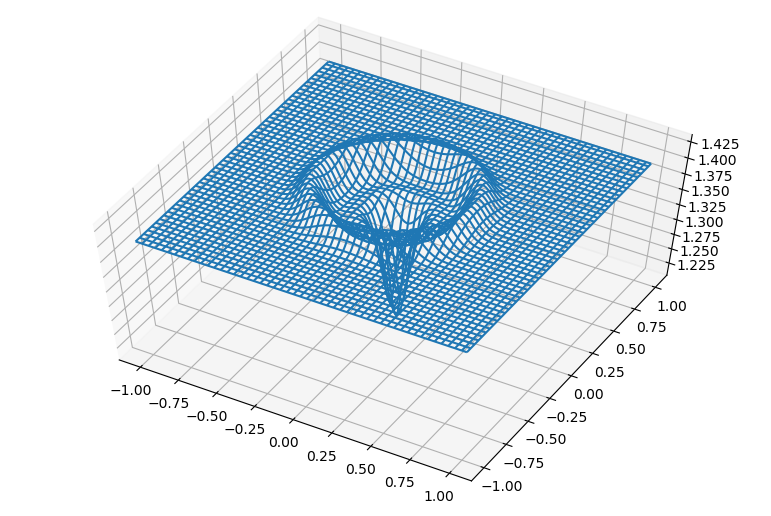

In [172]:
fig = plt.figure(1,figsize=(geo[0]/dpi, 1.2*geo[1]/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60.)

stride = 4

cx = ulz.mk_body_centered_linspace(-1,1,data.shape[0])
cy = ulz.mk_body_centered_linspace(-1,1,data.shape[1])

xs,ys = np.meshgrid(cx,cy)
zs = data

ax.plot_wireframe(xs,ys,zs,rstride=stride,cstride=stride)